<a href="https://colab.research.google.com/github/2403a52029-lab/NLP_LAB-ASSIGNMENTS/blob/main/NLP_LAB_05_2403A52029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from spacy.matcher import Matcher


In [3]:
df = pd.read_csv('/content/arxiv_data.csv')

df.head()


,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [4]:
df.columns


Index(['titles', 'summaries', 'terms'], dtype='object')

In [8]:
abstracts = df['summaries'].dropna().tolist()

# optional: limit for faster execution
abstracts = abstracts[:200]

In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
docs = [nlp(text) for text in abstracts]


In [11]:
noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

np_counter = Counter(noun_phrases)
np_counter.most_common(10)


[('we', 540),
 ('which', 172),
 ('that', 144),
 ('it', 120),
 ('this paper', 74),
 ('the-art', 72),
 ('our method', 50),
 ('image segmentation', 47),
 ('this work', 47),
 ('medical image segmentation', 37)]

In [12]:
entities = []

for doc in docs:
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))

entity_df = pd.DataFrame(entities, columns=["Entity", "Label"])
entity_df.head()


,Entity,Label
0,today,DATE
1,AI,GPE
2,AI,GPE
3,AI,GPE
4,five,CARDINAL


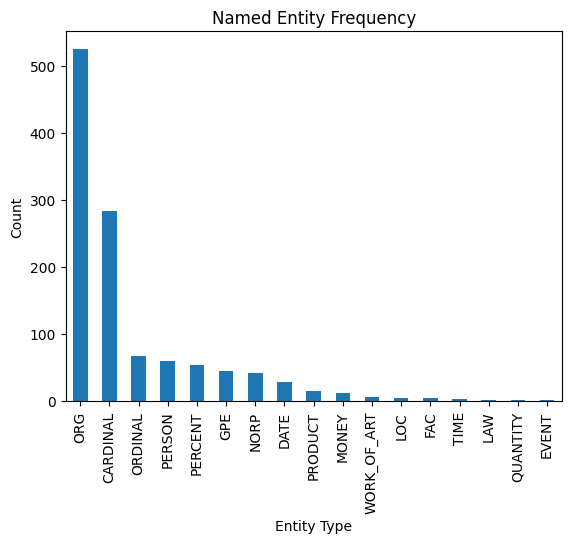

In [13]:
entity_counts = entity_df["Label"].value_counts()

plt.figure()
entity_counts.plot(kind="bar")
plt.title("Named Entity Frequency")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()


In [14]:
matcher = Matcher(nlp.vocab)

pattern = [
    {"POS": "ADJ"},
    {"POS": "NOUN"}
]

matcher.add("TECH_TERM", [pattern])


In [15]:
matched_terms = []

for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        matched_terms.append(doc[start:end].text.lower())

Counter(matched_terms).most_common(10)


[('medical image', 98),
 ('semantic segmentation', 49),
 ('deep learning', 39),
 ('medical images', 25),
 ('experimental results', 21),
 ('contextual information', 17),
 ('neural networks', 16),
 ('extensive experiments', 16),
 ('neural network', 16),
 ('contrastive learning', 15)]